In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_num_imputed_clean_modelling.csv')

In [2]:
df_arr = df.values
X = df.iloc[:,1:]
y = df.iloc[:,0]

----

In [ ]:
# Import the necessary modules

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values= np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet(max_iter = 1000))]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

In [15]:
from sklearn.preprocessing import scale

scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
print(df_scaled)

[[-0.62414218  0.01720105 -0.91220505 ... -0.25141326  2.33581709
  -0.32881565]
 [-0.24727145  0.2909669   0.24870777 ... -0.25141326  3.32379228
  -0.32881565]
 [ 0.94690932 -0.02526775 -0.52523411 ... -0.25141326 -0.29055483
  -0.32881565]
 ...
 [ 0.84701587 -0.03895604  0.00685094 ... -0.25141326 -0.29055483
  -0.32881565]
 [-0.11786403 -0.00736768 -0.13826317 ... -0.25141326 -0.29055483
   4.87785248]
 [ 0.64268836  0.13302506 -0.2350059  ... -0.25141326 -0.29055483
  -0.32881565]]


In [17]:
print(pd.DataFrame(df_scaled))

            0         1         2         3         4         5         6    \
0     -0.624142  0.017201 -0.912205 -0.588551 -0.023854 -0.354124 -0.338078   
1     -0.247271  0.290967  0.248708  0.886789  1.109160  1.807895  1.453514   
2      0.946909 -0.025268 -0.525234       NaN -0.176870 -0.099378 -0.338078   
3     -0.081539 -0.016328  0.252868 -1.642365 -0.053173  0.229577 -0.338078   
4     -0.099702 -0.111258 -0.573605 -0.925771 -0.468884 -1.054123 -1.233874   
...         ...       ...       ...       ...       ...       ...       ...   
16936 -0.826199 -0.090789 -0.389794 -0.567475 -0.318999 -0.066981  0.557718   
16937 -1.650320 -0.127052 -0.670348 -0.757161 -0.533127 -0.987944 -1.233874   
16938  0.847016 -0.038956  0.006851 -0.272407 -0.158181 -0.160573 -0.338078   
16939 -0.117864 -0.007368 -0.138263  0.886789  0.069590  0.273880  0.557718   
16940  0.642688  0.133025 -0.235006  0.465263  0.501771  0.617234  0.557718   

            7         8         9    ...       326 

In [19]:
df.iloc[:,0:50].describe()

,energy_consumption,rent,utilities_cost,heating_cost,cost_total,area,rooms,bedrooms,bathrooms,year_built,...,quality_of_appliances_Gehobene Qualität,quality_of_appliances_Luxus,quality_of_appliances_Normale Qualität,heating_type_Blockheizkraftwerke,heating_type_Elektro-Heizung,heating_type_Etagenheizung,heating_type_Fernwärme,heating_type_Fußbodenheizung,heating_type_Gas-Heizung,heating_type_Holz-Pelletheizung
count,16941.000000,16941.000000,16839.000000,11469.000000,16941.000000,16941.000000,16941.000000,10111.000000,12759.000000,16292.000000,...,16941.000000,16941.000000,16941.000000,16941.000000,16941.000000,16941.000000,16941.000000,16941.000000,16941.000000,16941.000000
mean,130.391549,820.991622,154.291840,77.924789,1000.422286,72.708982,2.377405,1.602215,1.081354,1947.198564,...,0.279381,0.018358,0.387167,0.000826,0.000472,0.088956,0.130512,0.011747,0.019361,0.000059
std,44.048233,2849.234254,103.370004,47.448758,856.148341,36.115443,1.116358,0.848348,0.293574,40.462935,...,0.448708,0.134246,0.487117,0.028736,0.021726,0.284688,0.336876,0.107747,0.137795,0.007683
min,0.200000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,1079.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.700000,501.190000,93.000000,50.000000,657.000000,51.850000,2.000000,1.000000,1.000000,1908.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.000000,664.000000,130.000000,70.000000,843.000000,65.060000,2.000000,1.000000,1.000000,1957.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,920.000000,185.000000,96.000000,1134.000000,84.000000,3.000000,2.000000,1.000000,1984.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1914.000000,365000.000000,3291.000000,1431.000000,77597.000000,1431.000000,54.000000,7.000000,3.000000,2019.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


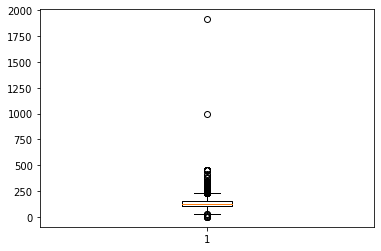

In [20]:
import matplotlib.pyplot as plt

_ = plt.boxplot(df['energy_consumption'])
plt.show()

C:\Users\test\anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\test\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


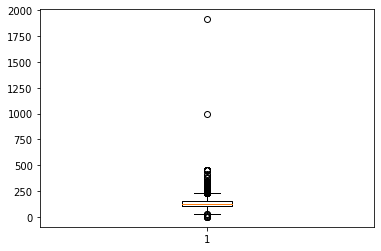

In [30]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).any(axis=1)
new_df = df[filtered_entries]
new_df

_ = plt.boxplot(new_df['energy_consumption'])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_num_imputed_clean_EDA.csv")

numericals = ['energy_consumption','rent','utilities_cost','heating_cost','cost_total',
                'area','rooms','bedrooms','bathrooms','year_built',
                'last_renovated','latitude','longitude','floor_act',
                'floor_max','parking_spaces']

df = df[numericals].fillna(np.median())

df_new = pd.DataFrame()

for col in df.columns:  
    series = df[np.abs(df[col]-df[col].mean()) <= (3*df[col].std())]
    df_new = pd.concat([df_new, series], axis = 1)


_ = plt.boxplot(df_new['energy_consumption'])
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16272 entries, 0 to 16271
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     15298 non-null  object 
 1   rent                     16272 non-null  float64
 2   utilities_cost           16272 non-null  float64
 3   heating_cost             16272 non-null  float64
 4   cost_total               16272 non-null  float64
 5   area                     16272 non-null  float64
 6   rooms                    16272 non-null  float64
 7   pets                     10281 non-null  object 
 8   condition                13965 non-null  object 
 9   quality_of_appliances    11384 non-null  object 
 10  heating_type             15046 non-null  object 
 11  energy_certificate_type  16272 non-null  object 
 12  ground_plan              16272 non-null  object 
 13  year_built               16272 non-null  int64  
 14  last_renovated        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_num_imputed_clean_EDA.csv")

numericals = ['energy_consumption','rent','utilities_cost','heating_cost','cost_total',
                'area','rooms','bedrooms','bathrooms','year_built',
                'last_renovated','latitude','longitude','floor_act',
                'floor_max','parking_spaces']

print(df.info())


# for col in numericals:
#     _ = plt.boxplot(df[col])
#     _ = plt.title(col)
#     plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16272 entries, 0 to 16271
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     15298 non-null  object 
 1   rent                     16272 non-null  float64
 2   utilities_cost           16272 non-null  float64
 3   heating_cost             16272 non-null  float64
 4   cost_total               16272 non-null  float64
 5   area                     16272 non-null  float64
 6   rooms                    16272 non-null  float64
 7   pets                     10281 non-null  object 
 8   condition                13965 non-null  object 
 9   quality_of_appliances    11384 non-null  object 
 10  heating_type             15046 non-null  object 
 11  energy_certificate_type  16272 non-null  object 
 12  ground_plan              16272 non-null  object 
 13  year_built               16272 non-null  int64  
 14  last_renovated        

In [ ]:
import numpy as np

contains_outliers = ['energy_consumption','rent','utilities_cost','heating_cost',
                     'cost_total','area']

df = df[contains_outliers]
df = df.fillna(df.median())

df_new = pd.DataFrame()

for col in df.columns:  
    series = df[np.abs(df[col]-df[col].mean()) <= (3*df[col].std())]
    df_new = pd.concat([df_new, series], axis = 1)


_ = plt.boxplot(df_new['energy_consumption'])
plt.show()


C:\Users\test\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\test\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\test\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\test\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_num_imputed_clean_EDA.csv")

contains_outliers = ['energy_consumption','rent','utilities_cost','heating_cost',
                     'cost_total','area']

df_outliers = df[contains_outliers]
df_outliers = df_outliers.fillna(df.median())

print(df.shape)
print(df_outliers[(np.abs(stats.zscore(df_outliers)) < 3).all(axis=1)].shape)

test_df = df[(np.abs(stats.zscore(df_outliers)) < 3).all(axis=1)]
print(test_df.shape)

(16272, 31)
(15383, 6)
(15383, 31)


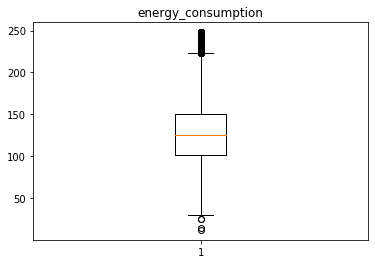

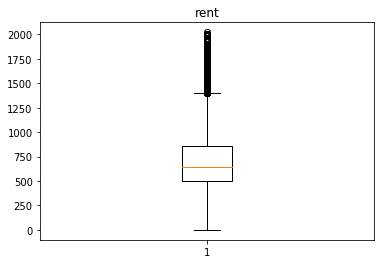

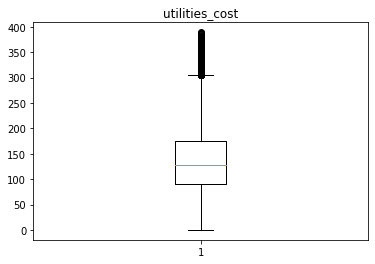

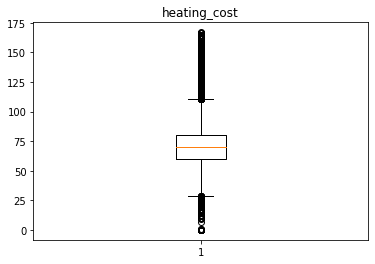

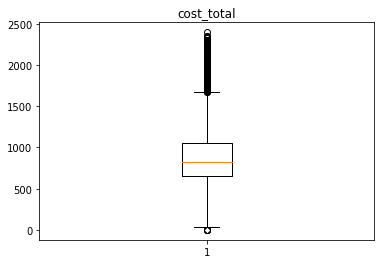

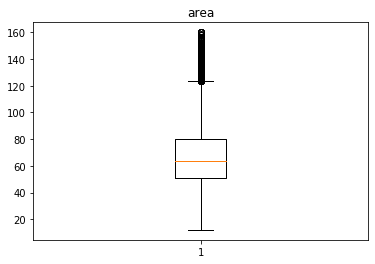

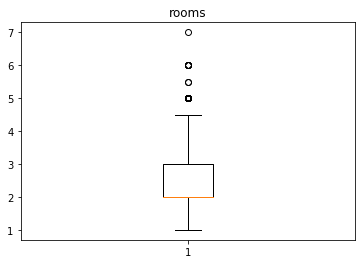

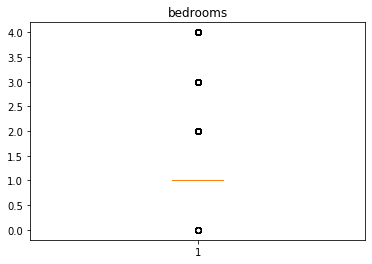

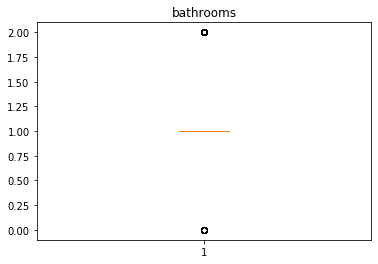

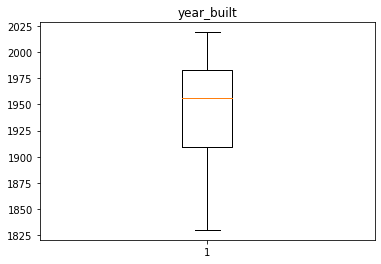

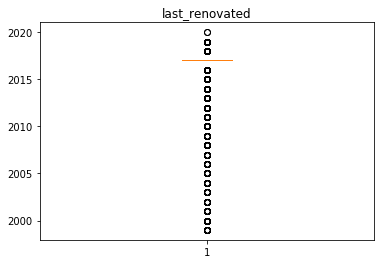

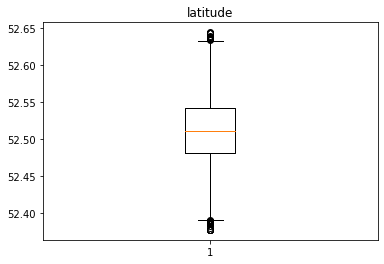

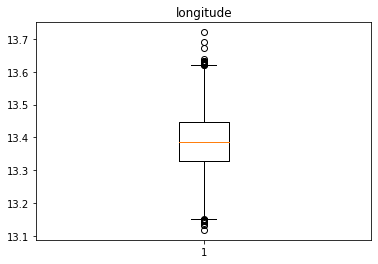

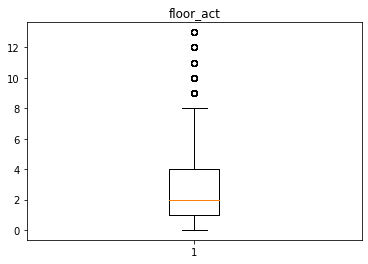

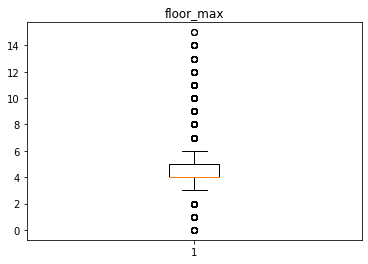

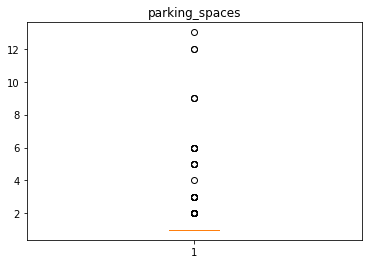

In [5]:
numericals = ['energy_consumption','rent','utilities_cost','heating_cost','cost_total',
                'area','rooms','bedrooms','bathrooms','year_built',
                'last_renovated','latitude','longitude','floor_act',
                'floor_max','parking_spaces']

for col in numericals:
    _ = plt.boxplot(test_df[col])
    _ = plt.title(col)
    plt.show()

In [6]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15383 entries, 0 to 16271
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     14475 non-null  object 
 1   rent                     15383 non-null  float64
 2   utilities_cost           15383 non-null  float64
 3   heating_cost             15383 non-null  float64
 4   cost_total               15383 non-null  float64
 5   area                     15383 non-null  float64
 6   rooms                    15383 non-null  float64
 7   pets                     9721 non-null   object 
 8   condition                13181 non-null  object 
 9   quality_of_appliances    10716 non-null  object 
 10  heating_type             14184 non-null  object 
 11  energy_certificate_type  15383 non-null  object 
 12  ground_plan              15383 non-null  object 
 13  year_built               15383 non-null  int64  
 14  last_renovated        

In [7]:
print(test_df.parking_spaces.value_counts(dropna=False))

1     15317
2        40
3         8
6         6
5         5
9         3
12        2
13        1
4         1
Name: parking_spaces, dtype: int64


In [4]:
import numpy as np
import pandas as pd

# Read data:
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/interim/berlin.csv", na_values=['nan', np.nan])
df = df.drop(['Unnamed: 0'], axis=1)

print(sum(df['parking'].isnull()) / len(df))

0.850244967829526


In [5]:
df.isnull().sum()

expose_id                       0
city                            0
title                           0
description                  1029
address_1                      19
address_2                       0
latitude                     1869
longitude                    1869
floor                        1260
type                         1041
rent                            0
utilities_cost                102
heating_cost                 5472
cost_total                      0
deposit                       473
area                            0
rooms                           0
bedrooms                     6830
bathrooms                    4182
energy                          0
equipment                    1536
parking                     14404
pets                         6248
year_built                    649
last_renovated              11098
condition                    2439
quality_of_appliances        5104
heating_type                 1322
energy_sources                731
energy_certifi